In [4]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
print(py3.version)

2.3.1
1.18.5
1.0.5


NameError: name 'py3' is not defined

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

train = np.loadtxt('train.csv', delimiter=',', dtype=np.float32)
test = np.loadtxt('test.csv', delimiter=',', dtype=np.float32)

x_train_data = train[:, 0:-5]
y_train_data = train[:, -5:]
x_test_data = test[:, 0:-5]
y_test_data = test[:, -5:]


In [24]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import models
from keras import layers

model = Sequential()

model.add(Dense(3, input_shape=(7,), activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 20        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist=model.fit(x_train_data, y_train_data, validation_data=(x_test_data, y_test_data), epochs=50)

Train on 945 samples, validate on 405 samples
Epoch 1/50
945/945 [==============================] - 0s 115us/sample - loss: 1.7100 - acc: 0.2286 - val_loss: 1.7004 - val_acc: 0.2296
Epoch 2/50
945/945 [==============================] - 0s 40us/sample - loss: 1.6744 - acc: 0.2370 - val_loss: 1.6741 - val_acc: 0.2346
Epoch 3/50
945/945 [==============================] - 0s 39us/sample - loss: 1.6531 - acc: 0.2360 - val_loss: 1.6537 - val_acc: 0.2395
Epoch 4/50
945/945 [==============================] - 0s 40us/sample - loss: 1.6362 - acc: 0.2349 - val_loss: 1.6386 - val_acc: 0.2420
Epoch 5/50
945/945 [==============================] - 0s 39us/sample - loss: 1.6247 - acc: 0.2413 - val_loss: 1.6287 - val_acc: 0.2494
Epoch 6/50
945/945 [==============================] - 0s 39us/sample - loss: 1.6168 - acc: 0.2550 - val_loss: 1.6219 - val_acc: 0.2494
Epoch 7/50
945/945 [==============================] - 0s 40us/sample - loss: 1.6099 - acc: 0.2561 - val_loss: 1.6170 - val_acc: 0.2469
Epoch 8/

In [26]:
loss, accuracy = model.evaluate(x_test_data, y_test_data)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.27


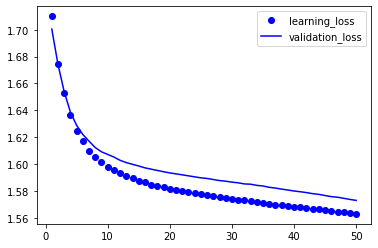

In [27]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, loss, "bo", label = "learning_loss")
plt.plot(epochs, val_loss, "b", label = "validation_loss")
plt.legend()


plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(x_test_data)
y_test_class = np.argmax(y_test_data,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45       100
           1       0.55      0.46      0.50        78
           2       0.56      0.60      0.58        62
           3       0.58      0.53      0.55        70
           4       0.46      0.57      0.51        95

    accuracy                           0.51       405
   macro avg       0.52      0.52      0.52       405
weighted avg       0.51      0.51      0.51       405

[[43 12 11  6 28]
 [12 36  7  8 15]
 [ 9  1 37  3 12]
 [13  8  4 37  8]
 [15  9  7 10 54]]


In [37]:
print(x_train_data)
np.argmax(model.predict([[10,0,0,10,4,5,1]]))

[[ 9.  6.  7. ...  9.  4.  8.]
 [ 0.  6.  7. ...  8.  0.  8.]
 [ 1.  6. 10. ...  0.  7.  9.]
 ...
 [10.  7.  5. ...  9.  4.  6.]
 [ 0.  3. 10. ...  6.  6.  8.]
 [ 7.  5.  3. ...  0.  6.  1.]]


2

In [42]:
import tensorflow as tf
from tensorflow import keras

model.save('my_model.h5')
